# Simulating a simple queue

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Continuous time simulation

A server queue can be modeled by a Poisson process, but, since we are using the continuous approach, the parameter that interests us is the arrival rate $\lambda$ (persons per minute).

The number of people $N$ to arrive in an interval of time $t$ can be modeled by the Poisson distribution with parameter $\lambda t$:
$$
P(N(t) = n) = \frac{e^{-\lambda t}(\lambda t)^n}{n!}
$$

Then, the probability for x people to arrive in an interval $\Delta t$ is
$$
P(\Delta N = x) = \frac{e^{-\lambda \Delta t}(\lambda \Delta t)^n}{n!}
$$

For $\Delta t \ll 1$, $P(x = n) \sim O(\Delta t^n)$ and we can ignore the probabilities for $n \geq 2$, leaving
$$
P(\Delta N = 1) = e^{-\lambda \Delta t}\lambda \Delta t \approx \lambda \Delta t
$$
and
$$
P(\Delta N = 0) \approx 1 - \lambda \Delta t
$$

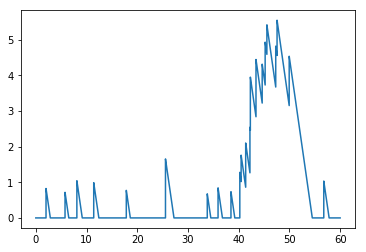

1.42473252608


In [11]:
# Sufficient small timestep
timestep = 1e-2

# At t = 0, there are no people at the queue
t = 0
N = 0 # Index of the arriving person

# Define a total simulation time
total_T = 60  # minutes

# Define total steps for the simulation
nsteps = int(total_T/timestep)

# Initialize the lists to plot
t_list = []
N_list = []
wt_list = []

# Initialize vitual time
v_time = 0
vt_list = []

# Define the service rate
prate = 3.0
# Define arrival rate
arate = 0.5  # people per minute

# Make a loop
for step in range(nsteps):
    # Update simulation time
    t = timestep*step

    # Determine if someone arrives
    if np.random.uniform(0,1) < arate*timestep:
        N += 1
        # Add the waiting time of this person
        wt_list.append(v_time)
        # add its work to virtual time
        v_time += np.random.uniform(2, 5)/prate
        
        
    # decrease virtual time by the ammount of work done
    v_time = max(0, v_time - timestep)

    # Update vectors to plot
    t_list.append(t)
    N_list.append(N)
    vt_list.append(v_time)

plt.plot(t_list, vt_list)
plt.show()

print(np.array(wt_list).mean()) 

## Event driven simulation

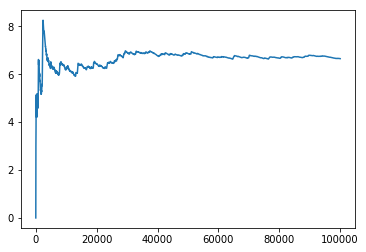

[ 1.41344083  0.47303786  0.09865774 ...,  0.35768075  4.29312893  0.296032  ]
[ 3.89766642  3.20606711  2.37003575 ...,  3.4064252   3.1642385
  4.48911365]


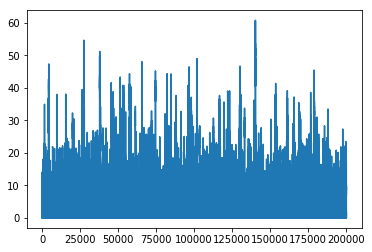

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# The cumulative average
def cma(sample):
    cma = [sample[0]]
    for n in range(1, len(sample)):
        cma.append((sample[n] + cma[n-1]*(n))/(n+1))
    return cma


# Total number of events, people entering the system.
N = 100000

# We use random variable to model interarrival times. The time between the
# arrivals of i and j costumer is Tj. Mean time = 2 min
T = np.random.exponential(2, N)

# The serice time is Si=Ri/v where R is the required ammount of water and v is
# the pump capacity (liters/minute)
R = np.random.uniform(2, 5, N)
v = 2.0
# v = 3
S = R/v

# Waiting times
W = [0]
for i in range(1, N):
    W.append(max(W[i-1] + S[i-1] - T[i], 0))

# How do we analyze the simulations?
# We can perform a cummulative average of the waiting time.
# print(np.array(W[50000:]).mean())

Wcma = cma(W)
plt.plot(Wcma)
plt.show()

# We can also plot the virtual waiting time.  This is defined as the time left
# to finish the current work accumulated in the queue. For this we need to
# account for each instantaneous instant in the simulation, since this is
# impossible we define a timestep to discretetizize time. 
# In general, it requires extra effort to account for continous variables in event driven simulations,
# but it can be done, either at simulation time, as here, or, more typically, at the analysis step, using
# the stored data.

# From now un time is counted in seconds.
timestep = 1/60  # 1 second
total_time = sum(T)
total_timesteps = int(total_time/timestep)

# Virtual time starts at zero and jumps with each arrival, decreases at
# constant rate v. This is a taste of continupus time simulations.
VWT = 0
VWT_list = []
next_arrival = T[0]
print(T)
print(R)
t = []
for t_step in range(total_timesteps):
    t.append(t_step*timestep)
    VWT = max(VWT - timestep, 0)
    if t_step*timestep >= next_arrival and len(R) > 0:
        VWT += R[0]/v
        R = R[1:]
        T = T[1:]
        if len(T) > 0:
            next_arrival += T[0]
    VWT_list.append(VWT)

plt.plot(t, VWT_list)
plt.show()
